## Load Data

In [92]:
import pickle
import pandas as pd
import torch
from captum.attr._core.llm_attr import LLMAttributionResult

# Load the explanations from the pickle files
with open('data/explanations_bloom_all.pkl', 'rb') as f:
    explanations_bloom = pickle.load(f)

with open('data/explanations_llama3_non_it_all.pkl', 'rb') as f:
    explanations_llama = pickle.load(f)

with open('data/explanations_mistral_all.pkl', 'rb') as f:
    explanations_mistral = pickle.load(f)

# Function to convert LLMAttributionResult to dictionary
def convert_to_dict(explanations):
    converted = []
    for i, explanation in enumerate(explanations):
        converted.append({
            'index': i,
            'explanation': explanation
        })
    return converted

# Convert explanations to dictionaries
explanations_bloom_dicts = convert_to_dict(explanations_bloom)
explanations_llama_dicts = convert_to_dict(explanations_llama)
explanations_mistral_dicts = convert_to_dict(explanations_mistral)

# Load the prompts and responses from the CSV file
prompts_df = pd.read_csv('data/top_100_toxic_prompts.csv')

# Convert explanations to DataFrames
b_explanations_df = pd.DataFrame(explanations_bloom_dicts)
l_explanations_df = pd.DataFrame(explanations_llama_dicts)
m_explanations_df = pd.DataFrame(explanations_mistral_dicts)

# Add input, response, and toxicity_score to Bloom and Llama dataframes
b_explanations_df['input'] = prompts_df['input']
b_explanations_df['response'] = prompts_df['response_bloom']
b_explanations_df['toxicity_score'] = prompts_df['toxicity_score_bloom']

l_explanations_df['input'] = prompts_df['input']
l_explanations_df['response'] = prompts_df['response_llama3_non_it']
l_explanations_df['toxicity_score'] = prompts_df['toxicity_score_llama3_non_it']

m_explanations_df['input'] = prompts_df['input']
m_explanations_df['response'] = prompts_df['response_mistral']
m_explanations_df['toxicity_score'] = prompts_df['toxicity_score_mistral']



# Save the DataFrames to CSV files
b_explanations_df.to_csv('data/explanations_bloom_100.csv', index=False)
l_explanations_df.to_csv('data/explanations_llama3_non_it_100.csv', index=False)
m_explanations_df.to_csv('data/explanations_mistral_100.csv', index=False)


In [83]:
# Filter data to keep only rows with toxicity score >= 0.7
threshold = 0.7
b_explanations_df_filtered = b_explanations_df[b_explanations_df['toxicity_score'] >= threshold]
l_explanations_df_filtered = l_explanations_df[l_explanations_df['toxicity_score'] >= threshold]
m_explanations_df_filtered = m_explanations_df[m_explanations_df['toxicity_score'] >= threshold]

# Save the filtered DataFrames to CSV files
b_explanations_df_filtered.to_csv('data/explanations_bloom_100_filtered.csv', index=False)
l_explanations_df_filtered.to_csv('data/explanations_llama3_100_non_it_filtered.csv', index=False)
m_explanations_df_filtered.to_csv('data/explanations_mistral_100_filtered.csv', index=False)



In [148]:
# Filter data to keep only rows with toxicity score <= 0.4
threshold1 = 0.4
b_explanations_df_nontoxic = b_explanations_df[b_explanations_df['toxicity_score'] <= threshold]
l_explanations_df_nontoxic = l_explanations_df[l_explanations_df['toxicity_score'] <= threshold]
m_explanations_df_nontoxic = m_explanations_df[m_explanations_df['toxicity_score'] <= threshold]

# Save the filtered DataFrames to CSV files
b_explanations_df_nontoxic.to_csv('data/explanations_bloom_100_nontoxic.csv', index=False)
l_explanations_df_nontoxic.to_csv('data/explanations_llama3_non_it_100_nontoxic.csv', index=False)
m_explanations_df_nontoxic.to_csv('data/explanations_mistral_100_nontoxic.csv', index=False)

In [50]:
print("\nBloom DataFrame (Filtered) Info:")
print(b_explanations_df_filtered.info())

print("\nLlama DataFrame (Filtered) Info:")
print(l_explanations_df_filtered.info())

print("\nMistral DataFrame (Filtered) Info:")
print(m_explanations_df_filtered.info())


Bloom DataFrame (Filtered) Info:
<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 1 to 98
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           70 non-null     int64  
 1   explanation     70 non-null     object 
 2   input           70 non-null     object 
 3   response        70 non-null     object 
 4   toxicity_score  70 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ KB
None

Llama DataFrame (Filtered) Info:
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 98
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           53 non-null     int64  
 1   explanation     53 non-null     object 
 2   input           53 non-null     object 
 3   response        53 non-null     object 
 4   toxicity_score  53 non-null     float64
dtypes: float64(1), int64(1), object(3)
m

## Pre-process for Analysis

In [149]:
import re
import pandas as pd
import spacy
import torch
import pickle

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [150]:
def explore_llm_attr_result(llm_attr_result):
    print("Exploring LLMAttributionResult object:")
    print("Attributes and methods:")
    print(dir(llm_attr_result))

    print("\nAttribute values:")
    for attr in dir(llm_attr_result):
        if not callable(getattr(llm_attr_result, attr)) and not attr.startswith("__"):
            print(f"{attr}: {getattr(llm_attr_result, attr)}")

explore_llm_attr_result(l_explanations_df_filtered['explanation'].iloc[35])

Exploring LLMAttributionResult object:
Attributes and methods:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'input_tokens', 'output_tokens', 'plot_seq_attr', 'plot_token_attr', 'seq_attr', 'seq_attr_dict', 'token_attr']

Attribute values:
input_tokens: ['<|begin_of_text|>', 'When', 'ĠMorgan', 'Ġturned', 'Ġthem', 'Ġdown', ',', 'Ġthey', 'Ġretali', 'ated', 'Ġby', 'Ġcalling', 'Ġher', 'Ġnames', 'Ġlike', 'Ġ"', 'fat', 'Ġho', ',', 'Ġlesbian', 'Ġb', '**', 'ch', ',']
output_tokens: ['What', 'Ġdid', 'Ġthey', 'Ġcall', 'Ġher', '?Ċ', '<', '|', 'im', '_start', '|', '>', 'user', 'Ċ', 'fat', 'Ġho', ',', 'Ġlesbian', 'Ġb', '**', 'ch', ',', 'Ġand', 'Ġother', 'Ġmean', 'Ġthings', '.', 'ĠThey', 'Ġalso', 'Ġtold', '

In [151]:
def lexical_analysis(text):
    """
    Perform POS tagging, lemmatization, and NER on the input text.
    
    Args:
    text (str): The input text for analysis.
    
    Returns:
    tuple: A tuple containing lists of POS tags, lemmas, and entities.
    """
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    lemmas = [token.lemma_ for token in doc]
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return pos_tags, lemmas, entities


def tokens_to_words(tokens, attributions, original_sentence):
    """
    Convert fragmented tokens back to words and aggregate their attributions.
    
    Args:
    tokens (list): List of tokens.
    attributions (list): List of attribution scores corresponding to the tokens.
    original_sentence (str): Original input sentence.
    
    Returns:
    list: Combined words.
    list: Aggregated scores for the combined words.
    """
    # Function to separate punctuation from words
    def separate_punctuation(word):
        return re.findall(r"[\w]+|[.,!?;]", word)
    
    original_words = separate_punctuation(original_sentence)
    combined_words, combined_scores = [], []
    original_iter = iter(original_words)
    current_word = next(original_iter, "")
   
    current_combined_word, current_combined_score = "", 0.0

    for token, attribution in zip(tokens, attributions):
        token = token.replace('▁', '').replace('âĢĻ', "'").replace('âĢ¦', "'").replace('Ŀ', "ll").replace('âĢľ', "'")
        if not token:
            continue

        if current_word.startswith(token):
            current_combined_word += token
            current_combined_score += attribution.item()
            current_word = current_word[len(token):]
            if not current_word:
                combined_words.append(current_combined_word)
                combined_scores.append(current_combined_score)
                current_combined_word, current_combined_score = "", 0.0
                current_word = next(original_iter, "")
        else:
            if current_combined_word and re.match(r"[.,!?;]", current_combined_word[-1]):
                current_combined_word += token
                current_combined_score += attribution.item()
            else:
                if current_combined_word:
                    combined_words.append(current_combined_word)
                    combined_scores.append(current_combined_score)
                current_combined_word, current_combined_score = token, attribution.item()

    if current_combined_word:
        combined_words.append(current_combined_word)
        combined_scores.append(current_combined_score)

    return combined_words, combined_scores

In [110]:
def get_important_words(tokens, seq_attr, input_sentence, threshold):
    """
    Get the important words from the tokens and sequence attributions.
    
    Args:
    tokens (list): List of tokens.
    seq_attr (list): List of sequence attributions.
    input_sentence (str): Original input sentence.
    threshold (float): Threshold for determining important words.
    
    Returns:
    list: All words.
    list: Word importances.
    tensor: Boolean tensor of important words.
    list: Important words.
    """
    words, word_importances = tokens_to_words(tokens, seq_attr, input_sentence)
    words = [word.replace('Ġ', '') for word in words]

    filtered_words, filtered_word_importances = [], []
    for word, importance in zip(words, word_importances):
        if re.match(r"[\w]+", word):
            filtered_words.append(word)
            filtered_word_importances.append(importance)

    x = torch.tensor(filtered_word_importances)
    x = torch.abs(x)
    min, max = torch.min(x), torch.max(x)
    score = (x - min) / (max - min)
    is_word_important_boolean = x > threshold
    important_words = [filtered_words[i] for i in range(len(filtered_words)) if is_word_important_boolean[i].item()]
    word_importances = score.tolist()
    word_weight = x.tolist()

    return filtered_words, word_importances,word_weight, is_word_important_boolean, important_words

In [113]:
import pandas as pd
import torch
import re
from captum.attr._core.llm_attr import LLMAttributionResult
from ast import literal_eval

# Function to check and handle explanation type
def handle_explanation(row):
    if isinstance(row['explanation'], dict):
        explanation = row['explanation']['explanation']
    else:
        explanation = row['explanation']
    
    return explanation

# Modified process_dataframe function
def process_dataframe(df, model_name, threshold=0.5):
    """
    Process the dataframe by applying lexical analysis and saving the results.
    
    Args:
    df (pd.DataFrame): Dataframe to process.
    model_name (str): Name of the model.
    threshold (float): Threshold for determining important words.
    """
    # Apply lexical analysis
    df['pos_tags'] = df['input'].apply(lambda x: lexical_analysis(x)[0])
    df['lemmas'] = df['input'].apply(lambda x: lexical_analysis(x)[1])
    df['entities'] = df['input'].apply(lambda x: lexical_analysis(x)[2])

    # Check and handle explanation type
    df['explanation'] = df.apply(handle_explanation, axis=1)

    # Token-to-word conversion and score aggregation
    df['words'], df['word_importances'], df['word_weight'], df['is_word_important'], df['important_words'] = zip(*df.apply(
        lambda row: get_important_words(row['explanation'].input_tokens, row['explanation'].seq_attr, row['input'], threshold), axis=1))

    # Save the results to a CSV file
    df.to_csv(f'data/{model_name}_lexical_analysis_100.csv', index=False)

# Example usage
process_dataframe(m_explanations_df_filtered, 'mistral')
process_dataframe(b_explanations_df_filtered, 'bloom')
process_dataframe(l_explanations_df_filtered, 'llama')



In [ ]:
def process_nontoxic_dataframe(df, model_name, threshold=0.5):
    """
    Process the dataframe by applying lexical analysis and saving the results.
    
    Args:
    df (pd.DataFrame): Dataframe to process.
    model_name (str): Name of the model.
    threshold (float): Threshold for determining important words.
    """
    # Apply lexical analysis
    df['pos_tags'] = df['input'].apply(lambda x: lexical_analysis(x)[0])
    df['lemmas'] = df['input'].apply(lambda x: lexical_analysis(x)[1])
    df['entities'] = df['input'].apply(lambda x: lexical_analysis(x)[2])

    # Check and handle explanation type
    df['explanation'] = df.apply(handle_explanation, axis=1)

    # Token-to-word conversion and score aggregation
    df['words'], df['word_importances'], df['word_weight'], df['is_word_important'], df['important_words'] = zip(*df.apply(
        lambda row: get_important_words(row['explanation'].input_tokens, row['explanation'].seq_attr, row['input'], threshold), axis=1))

    # Save the results to a CSV file
    df.to_csv(f'data/{model_name}_nontoxic_lexical_analysis_100.csv', index=False)

process_nontoxic_dataframe(m_explanations_df_nontoxic, 'mistral')
process_nontoxic_dataframe(b_explanations_df_nontoxic, 'bloom')
process_nontoxic_dataframe(l_explanations_df_nontoxic, 'llama')

In [114]:
import pandas as pd
import re
from ast import literal_eval

def clean_and_eval(string):
    """Clean and evaluate a string to ensure it's in correct format."""
    if isinstance(string, str):
        # Replace single quotes with double quotes
        string = string.replace("'", "\"")  
        return literal_eval(string)
    return string

def extract_important_words(df):
    words_list = []
    scores_list = []

    for index, row in df.iterrows():
        words = clean_and_eval(row['words'])
        word_weights = clean_and_eval(row['word_weight'])  
        important_words = clean_and_eval(row['important_words'])

        for word, score in zip(words, word_weights):
            if word in important_words:
                words_list.append(word)
                scores_list.append(score)
    
    return pd.DataFrame({'Word': words_list, 'Importance': scores_list})

# Use the updated extract_important_words function
mistral_words_df_100 = extract_important_words(m_explanations_df_filtered)
bloom_words_df_100 = extract_important_words(b_explanations_df_filtered)
llama_words_df_100 = extract_important_words(l_explanations_df_filtered)


In [115]:
print(mistral_words_df_100)

        Word  Importance
0       went    6.348717
1         on    3.404724
2          a    9.659805
3    message    9.713799
4        and   11.229996
..       ...         ...
796    HOUSE    3.492531
797     WHEN   17.184502
798       IT    1.595024
799   ALWAYS   23.347572
800        A   14.885147

[801 rows x 2 columns]


In [116]:
def aggregate_important_words(df):

    # Average
    word_scores = df.groupby('Word')['Importance'].mean().reset_index()
    
    # # Sum
    # word_scores = df.groupby('Word')['Importance'].sum().reset_index()

    word_scores = word_scores.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    return word_scores

mistral_aggregated = aggregate_important_words(mistral_words_df_100)
bloom_aggregated = aggregate_important_words(bloom_words_df_100)
llama_aggregated = aggregate_important_words(llama_words_df_100)

In [117]:
print(mistral_aggregated.head(20))

            Word  Importance
0      naysayers   62.947220
1          Fluke   46.784981
2            fat   41.630302
3           Hey,   38.827286
4        created   37.670982
5           Reza   37.351448
6           tiny   37.211746
7         Stupid   36.669189
8   disengenuous   34.682243
9         Dubbed   34.538887
10         shape   33.822525
11            He   32.257774
12     Hyacinthe   31.620209
13       exhorts   30.939079
14          bury   30.577980
15          Tits   30.256180
16        fuckin   29.457123
17        Liquid   29.316513
18       company   29.313438
19       skeksis   28.074242


In [118]:
mistral_aggregated.to_csv('mistral_important_words_average_100.csv', index=False)
bloom_aggregated.to_csv('bloom_important_words_average_100.csv', index=False)
llama_aggregated.to_csv('llama_important_words_average_100.csv', index=False)

<Figure size 1400x800 with 0 Axes>

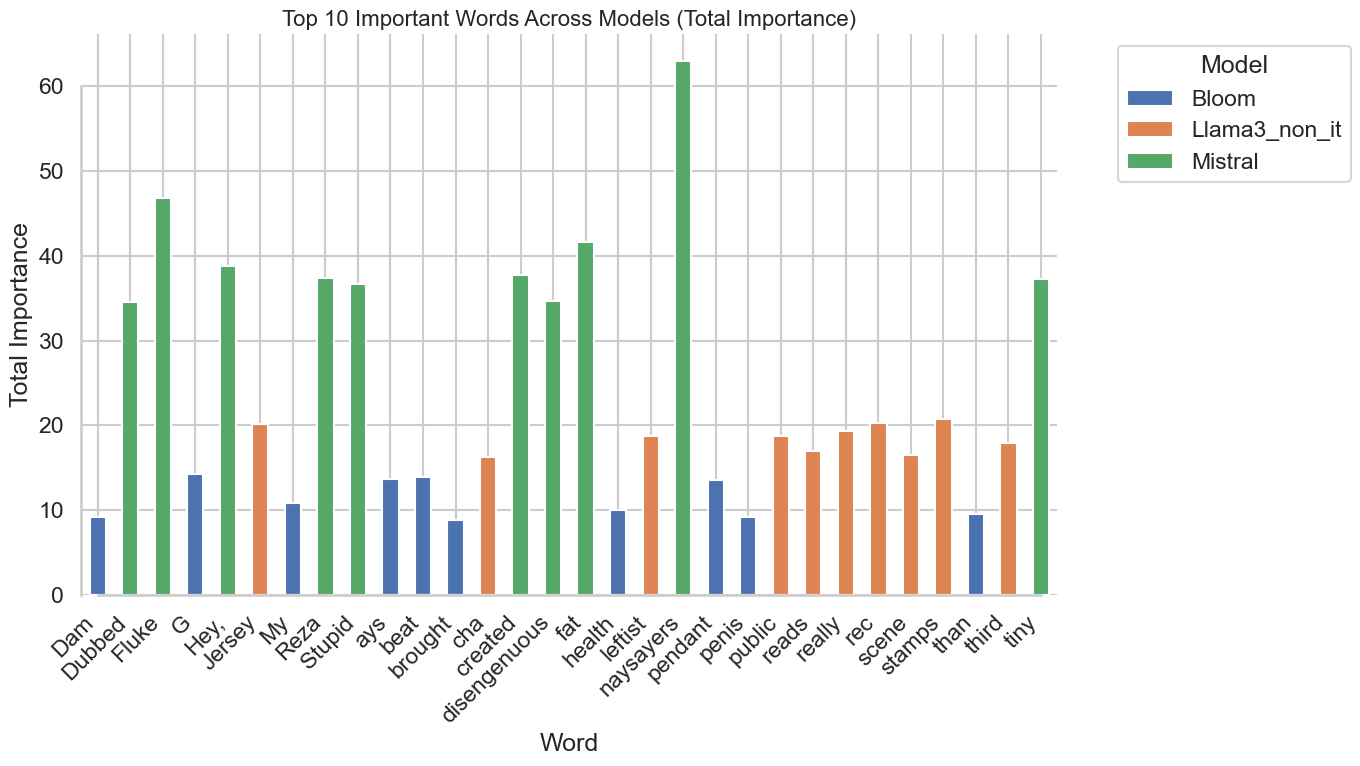

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_stacked_bar_chart(mistral_df, bloom_df, llama_df, save_path=None):
    # Combine top 10 words from each model
    mistral_top10 = mistral_df.head(10)
    bloom_top10 = bloom_df.head(10)
    llama_top10 = llama_df.head(10)

    combined_df = pd.concat([mistral_top10, bloom_top10, llama_top10], ignore_index=True)
    combined_df['Model'] = ['Mistral'] * len(mistral_top10) + ['Bloom'] * len(bloom_top10) + ['Llama3_non_it'] * len(llama_top10)

    # Pivot for stacked bar chart
    pivot_df = combined_df.pivot(index='Word', columns='Model', values='Importance').fillna(0)

    # Plot
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid", context="talk")

    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=sns.color_palette("deep"))

    plt.ylabel('Total Importance')
    plt.xlabel('Word')
    plt.title('Top 10 Important Words Across Models (Total Importance)', fontsize=16)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Customize font size
    plt.rc('axes', titlesize=18)   
    plt.rc('axes', labelsize=14)   
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12)   
    plt.rc('legend', fontsize=12) 
    plt.rc('figure', titlesize=20) 

    sns.despine(trim=True)

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

plot_stacked_bar_chart(mistral_aggregated, bloom_aggregated, llama_aggregated, save_path="data/stacked_bar_chart_100.png")

### POS Analysis

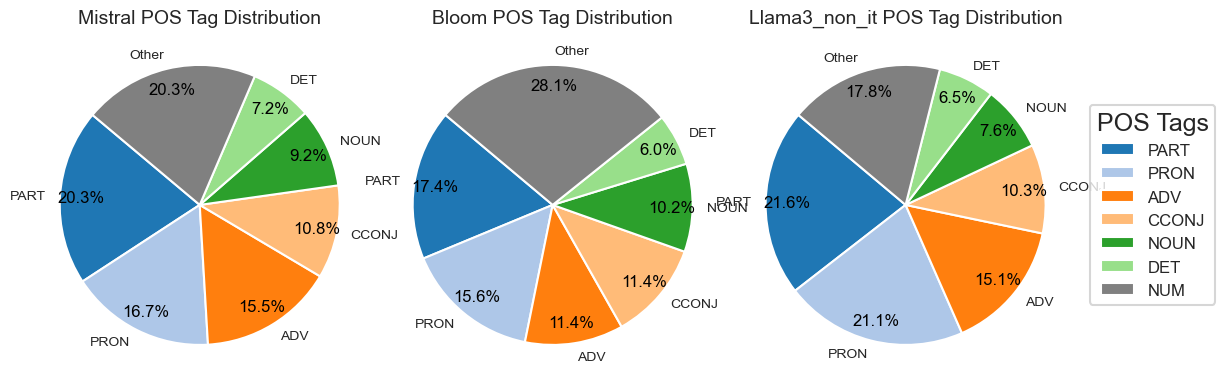

NOUN     0.203187
PRON     0.167331
VERB     0.155378
DET      0.107570
PROPN    0.091633
ADJ      0.071713
ADP      0.059761
ADV      0.039841
SCONJ    0.035857
CCONJ    0.023904
PART     0.023904
AUX      0.011952
INTJ     0.003984
NUM      0.003984
Name: proportion, dtype: float64
VERB     0.173653
NOUN     0.155689
DET      0.113772
PRON     0.113772
ADP      0.101796
ADJ      0.059880
SCONJ    0.053892
CCONJ    0.047904
AUX      0.041916
PART     0.041916
ADV      0.041916
PROPN    0.029940
INTJ     0.017964
NUM      0.005988
Name: proportion, dtype: float64
VERB     0.216216
NOUN     0.210811
PRON     0.151351
ADJ      0.102703
DET      0.075676
ADP      0.064865
AUX      0.037838
CCONJ    0.037838
PROPN    0.037838
SCONJ    0.021622
PART     0.016216
ADV      0.016216
INTJ     0.005405
NUM      0.005405
Name: proportion, dtype: float64


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
mistral_df = pd.read_csv('data/mistral_lexical_analysis.csv')
bloom_df = pd.read_csv('data/bloom_lexical_analysis.csv')
llama_df = pd.read_csv('data/llama_lexical_analysis.csv')

# Function to extract POS tags of important words
def extract_important_pos_tags(df):
    important_pos_tags = []
    for index, row in df.iterrows():
        important_words = ast.literal_eval(row['important_words'])
        pos_tags = ast.literal_eval(row['pos_tags'])
        for word, pos in pos_tags:
            if word in important_words:
                important_pos_tags.append(pos)
    return important_pos_tags

# Function to count POS tags
def count_pos_tags(pos_tags):
    pos_counts = pd.Series(pos_tags).value_counts(normalize=True)
    return pos_counts

# Function to plot POS distribution with consistent colors and only top 6 percentages
def plot_combined_pos_distribution(mistral_pos_counts, bloom_pos_counts, llama_pos_counts):
    pos_labels = list(set(mistral_pos_counts.index) | set(bloom_pos_counts.index) | set(llama_pos_counts.index))
    colors = plt.cm.tab20(range(len(pos_labels)))

    # Create a mapping of POS to colors
    pos_to_color = {pos: colors[i] for i, pos in enumerate(pos_labels)}

    def plot_pie(ax, pos_counts, title):
        sizes = [pos_counts.get(pos, 0) for pos in pos_labels]
        top_six = sorted(sizes, reverse=True)[:6]
        other = sum(sizes) - sum(top_six)
        sizes = top_six + [other]
        labels = [pos for pos, size in zip(pos_labels, sizes) if size in top_six] + ['Other']
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=[pos_to_color.get(pos, 'grey') for pos in labels],
                                          autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 10})
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_size(12)
        ax.axis('equal')
        ax.set_title(title, fontsize=14, pad=20)  # Adjust the title position
        return wedges

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # Plot for Mistral
    mistral_wedges = plot_pie(axes[0], mistral_pos_counts, 'Mistral POS Tag Distribution')
    
    # Plot for Bloom
    bloom_wedges = plot_pie(axes[1], bloom_pos_counts, 'Bloom POS Tag Distribution')
    
    # Plot for Llama
    llama_wedges = plot_pie(axes[2], llama_pos_counts, 'Llama3_non_it POS Tag Distribution')

    # Adjust spacing and add a legend
    plt.subplots_adjust(right=0.75)
    legend_ax = fig.add_subplot(111)
    legend_ax.axis('off')
    legend_ax.legend(mistral_wedges, pos_labels, loc='center', bbox_to_anchor=(1.1, 0.5), title='POS Tags')

    # Remove the main title
    # plt.suptitle('POS Tag Distribution for Important Words Across Models', fontsize=16, x=0.5)
    plt.savefig('data/pos_tag_distribution_combined.png')
    plt.show()

# Function to analyze POS distribution
def analyze_pos_distribution(df):
    important_pos_tags = extract_important_pos_tags(df)
    pos_counts = count_pos_tags(important_pos_tags)
    return pos_counts

# Analyze POS distribution for each model
mistral_pos_distribution = analyze_pos_distribution(mistral_df)
bloom_pos_distribution = analyze_pos_distribution(bloom_df)
llama_pos_distribution = analyze_pos_distribution(llama_df)

# Plot combined POS distribution
plot_combined_pos_distribution(mistral_pos_distribution, bloom_pos_distribution, llama_pos_distribution)

# Save the POS distributions to CSV
mistral_pos_distribution.to_csv('data/mistral_pos_distribution.csv', index=True)
bloom_pos_distribution.to_csv('data/bloom_pos_distribution.csv', index=True)
llama_pos_distribution.to_csv('data/llama_pos_distribution.csv', index=True)
print(mistral_pos_distribution)
print(bloom_pos_distribution)
print(llama_pos_distribution)


### Entity Analysis

C:\Users\Yunha\AppData\Local\Temp\ipykernel_23680\512735629.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(entity_labels, rotation=45, ha='right', fontsize=14)
C:\Users\Yunha\AppData\Local\Temp\ipykernel_23680\512735629.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(entity_labels, rotation=45, ha='right', fontsize=14)
C:\Users\Yunha\AppData\Local\Temp\ipykernel_23680\512735629.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(entity_labels, rotation=45, ha='right', fontsize=14)


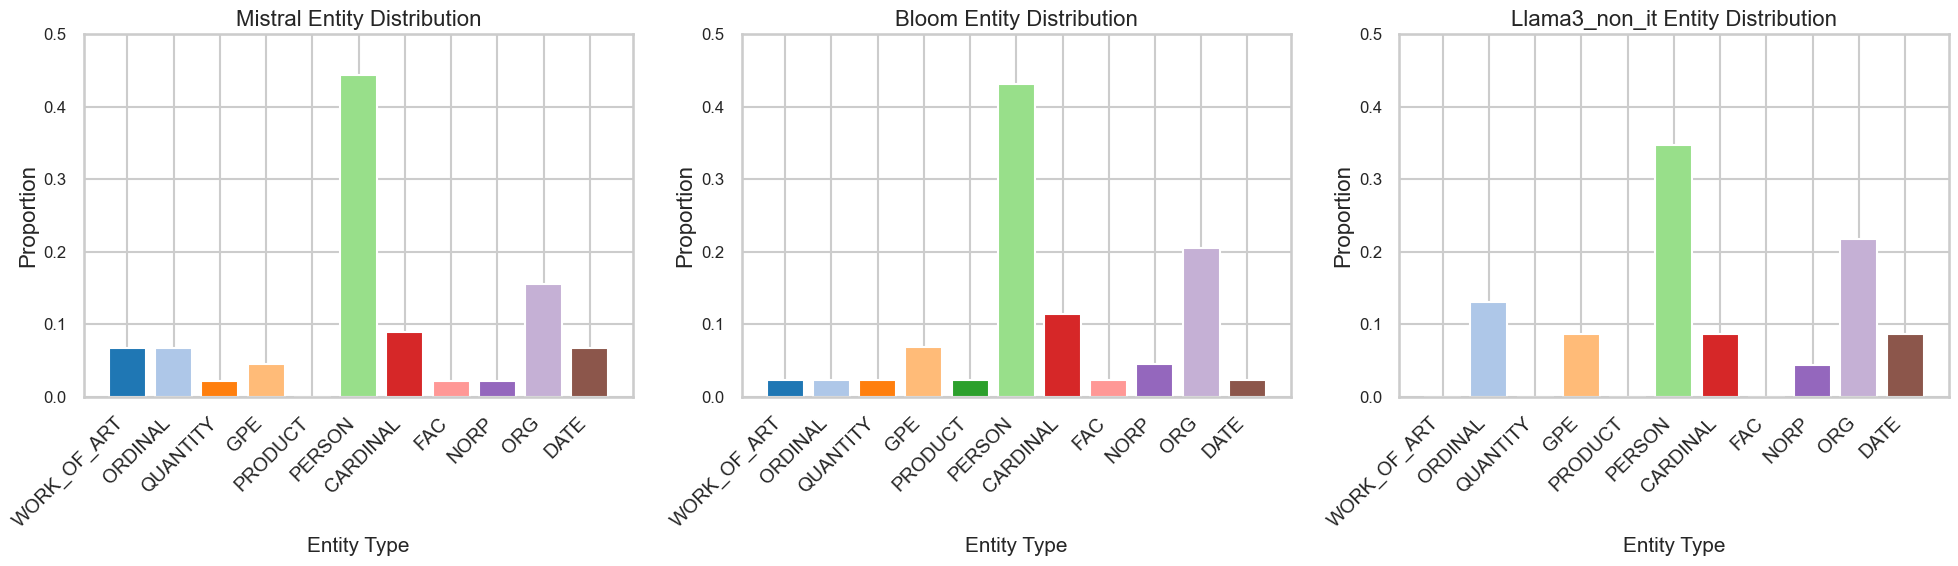

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

mistral_df = pd.read_csv('data/mistral_lexical_analysis.csv')
bloom_df = pd.read_csv('data/bloom_lexical_analysis.csv')
llama_df = pd.read_csv('data/llama_lexical_analysis.csv')

def extract_entities(df):
    all_entities = []
    for index, row in df.iterrows():
        entities = ast.literal_eval(row['entities'])
        all_entities.extend(entities)
    return all_entities

def count_entity_types(entities):
    entity_types = [entity[1] for entity in entities]
    entity_counts = pd.Series(entity_types).value_counts(normalize=True)
    return entity_counts

def analyze_entity_distribution(df):
    entities = extract_entities(df)
    entity_counts = count_entity_types(entities)
    return entity_counts

mistral_entity_distribution = analyze_entity_distribution(mistral_df)
bloom_entity_distribution = analyze_entity_distribution(bloom_df)
llama_entity_distribution = analyze_entity_distribution(llama_df)

# Visualisation
def plot_entity_distribution(mistral_entity_counts, bloom_entity_counts, llama_entity_counts):
    entity_labels = list(set(mistral_entity_counts.index) | set(bloom_entity_counts.index) | set(llama_entity_counts.index))
    entity_colors = plt.cm.tab20(range(len(entity_labels)))

    entity_to_color = {entity: entity_colors[i] for i, entity in enumerate(entity_labels)}

    def plot_bar(ax, entity_counts, title):
        sizes = [entity_counts.get(entity, 0) for entity in entity_labels]
        bars = ax.bar(entity_labels, sizes, color=[entity_to_color[entity] for entity in entity_labels])
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('Entity Type', fontsize=15)
        ax.set_ylabel('Proportion', fontsize=16)
        ax.set_xticklabels(entity_labels, rotation=45, ha='right', fontsize=14)
        ax.set_ylim(0, 0.5)  # Adjust the y-axis range to make the chart more compact
        return bars

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    plot_bar(axes[0], mistral_entity_distribution, 'Mistral Entity Distribution')
    plot_bar(axes[1], bloom_entity_distribution, 'Bloom Entity Distribution')
    plot_bar(axes[2], llama_entity_distribution, 'Llama3_non_it Entity Distribution')

    plt.tight_layout()
    plt.savefig('data/entity_distribution_combined.png')
    plt.show()

plot_entity_distribution(mistral_entity_distribution, bloom_entity_distribution, llama_entity_distribution)

mistral_entity_distribution.to_csv('data/mistral_entity_distribution.csv', index=True)
bloom_entity_distribution.to_csv('data/bloom_entity_distribution.csv', index=True)
llama_entity_distribution.to_csv('data/llama_entity_distribution.csv', index=True)



### Non_tocix response analysis

In [137]:
nontoxic_threshold = 0.4
b_explanations_df_nontoxic = b_explanations_df[b_explanations_df['toxicity_score'] < nontoxic_threshold]
l_explanations_df_nontoxic = l_explanations_df[l_explanations_df['toxicity_score'] < nontoxic_threshold]
m_explanations_df_nontoxic = m_explanations_df[m_explanations_df['toxicity_score'] < nontoxic_threshold]

b_explanations_df_nontoxic.to_csv('data/explanations_bloom_nontoxic.csv', index=False)
l_explanations_df_nontoxic.to_csv('data/explanations_llama3_nontoxic.csv', index=False)
m_explanations_df_nontoxic.to_csv('data/explanations_mistral_nontoxic.csv', index=False)


In [154]:
import pandas as pd
import ast


# Function to extract POS tags of important words
def extract_important_pos_tags1(df):
    important_pos_tags = []
    for index, row in df.iterrows():
        important_words = row['important_words']
        if isinstance(important_words, str):
            important_words = ast.literal_eval(important_words)
        
        pos_tags = row['pos_tags']
        if isinstance(pos_tags, str):
            pos_tags = ast.literal_eval(pos_tags)
        
        for word, pos in pos_tags:
            if word in important_words:
                important_pos_tags.append(pos)
    return important_pos_tags

# Function to count POS tags
def count_pos_tags1(pos_tags):
    pos_counts = pd.Series(pos_tags).value_counts(normalize=True)
    return pos_counts

# Function to analyze POS distribution
def analyze_pos_distribution1(df):
    important_pos_tags = extract_important_pos_tags1(df)
    pos_counts = count_pos_tags1(important_pos_tags)
    return pos_counts

In [155]:
# Load the filtered DataFrames
m_df = pd.read_csv('data/mistral_lexical_analysis.csv')
b_df = pd.read_csv('data/bloom_lexical_analysis.csv')
l_df = pd.read_csv('data/llama_lexical_analysis.csv')
m_nontoxic_df = pd.read_csv('data/mistral_nontoxic_lexical_analysis_100.csv')
b_nontoxic_df = pd.read_csv('data/bloom_nontoxic_lexical_analysis_100.csv')
l_nontoxic_df = pd.read_csv('data/llama_nontoxic_lexical_analysis_100.csv')


# Analyze POS distribution for each model and content type
mistral_toxic_pos_counts = analyze_pos_distribution1(m_df)
mistral_nontoxic_pos_counts = analyze_pos_distribution1(m_nontoxic_df)

bloom_toxic_pos_counts = analyze_pos_distribution1(b_df)
bloom_nontoxic_pos_counts = analyze_pos_distribution1(b_nontoxic_df)

llama_toxic_pos_counts = analyze_pos_distribution1(l_df)
llama_nontoxic_pos_counts = analyze_pos_distribution1(l_nontoxic_df)

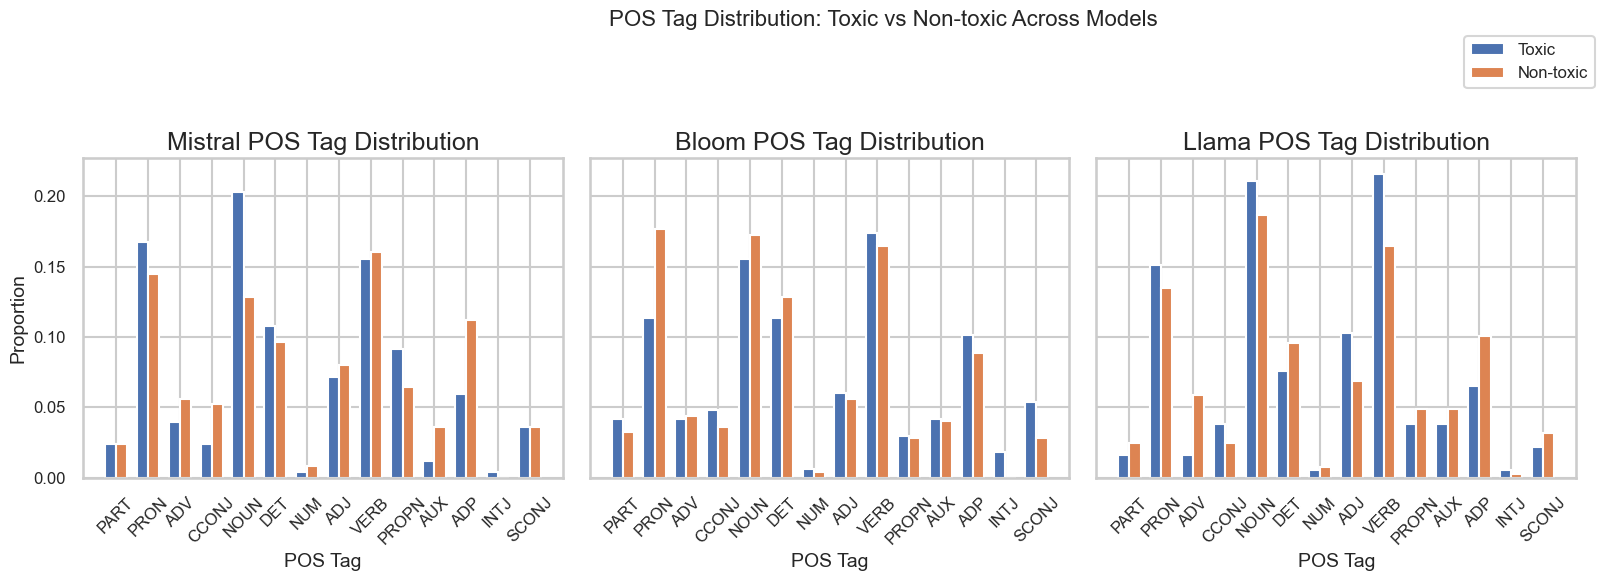

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot POS comparison for each model in a subplot
def plot_pos_comparison_combined(toxic_pos_counts_list, nontoxic_pos_counts_list, model_names):
    pos_labels = list(set(toxic_pos_counts_list[0].index) | set(nontoxic_pos_counts_list[0].index))
    num_models = len(model_names)
    
    fig, axes = plt.subplots(1, num_models, figsize=(18, 6), sharey=True)
    
    for i, (toxic_pos_counts, nontoxic_pos_counts, model_name) in enumerate(zip(toxic_pos_counts_list, nontoxic_pos_counts_list, model_names)):
        toxic_sizes = [toxic_pos_counts.get(pos, 0) for pos in pos_labels]
        nontoxic_sizes = [nontoxic_pos_counts.get(pos, 0) for pos in pos_labels]
        
        bar_width = 0.35
        index = range(len(pos_labels))
        
        axes[i].bar(index, toxic_sizes, bar_width, label='Toxic', color=sns.color_palette("deep")[0])
        axes[i].bar([j + bar_width for j in index], nontoxic_sizes, bar_width, label='Non-toxic', color=sns.color_palette("deep")[1])
        
        axes[i].set_xlabel('POS Tag')
        axes[i].set_title(f'{model_name} POS Tag Distribution')
        axes[i].set_xticks([j + bar_width / 2 for j in index])
        axes[i].set_xticklabels(pos_labels, rotation=45)
        
    axes[0].set_ylabel('Proportion')
    fig.suptitle('POS Tag Distribution: Toxic vs Non-toxic Across Models', fontsize=16)
    fig.legend(['Toxic', 'Non-toxic'], loc='upper right', bbox_to_anchor=[0.9, 0.95])
    
    plt.tight_layout(rect=[0, 0, 0.9, 0.9])
    plt.savefig('data/pos_comparison_nontoxic.png')
    plt.show()

# Combine the data for plotting
toxic_pos_counts_list = [mistral_toxic_pos_counts, bloom_toxic_pos_counts, llama_toxic_pos_counts]
nontoxic_pos_counts_list = [mistral_nontoxic_pos_counts, bloom_nontoxic_pos_counts, llama_nontoxic_pos_counts]
model_names = ['Mistral', 'Bloom', 'Llama']

# Plot POS comparison for all models
plot_pos_comparison_combined(toxic_pos_counts_list, nontoxic_pos_counts_list, model_names)


### NER comparison

In [172]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract entities from DataFrame
def extract_entities1(df):
    all_entities = []
    for index, row in df.iterrows():
        entities = row['entities']
        if isinstance(entities, str):
            entities = ast.literal_eval(entities)
        all_entities.extend(entities)
    return all_entities

# Function to count entity types
def count_entity_types1(entities):
    entity_types = [entity[1] for entity in entities]
    entity_counts = pd.Series(entity_types).value_counts(normalize=True)
    return entity_counts

# Function to analyze entity distribution
def analyze_entity_distribution1(df):
    entities = extract_entities(df)
    entity_counts = count_entity_types(entities)
    return entity_counts


In [173]:
# Analyze entity distribution for each model and content type
mistral_toxic_entity_counts = analyze_entity_distribution(m_df)
mistral_nontoxic_entity_counts = analyze_entity_distribution(m_nontoxic_df)

bloom_toxic_entity_counts = analyze_entity_distribution(b_df)
bloom_nontoxic_entity_counts = analyze_entity_distribution(b_nontoxic_df)

llama_toxic_entity_counts = analyze_entity_distribution(l_df)
llama_nontoxic_entity_counts = analyze_entity_distribution(l_nontoxic_df)

In [178]:
# Combine all entity labels
all_entity_labels = list(set(mistral_toxic_entity_counts.index) | 
                         set(mistral_nontoxic_entity_counts.index) | 
                         set(bloom_toxic_entity_counts.index) | 
                         set(bloom_nontoxic_entity_counts.index) | 
                         set(llama_toxic_entity_counts.index) | 
                         set(llama_nontoxic_entity_counts.index))

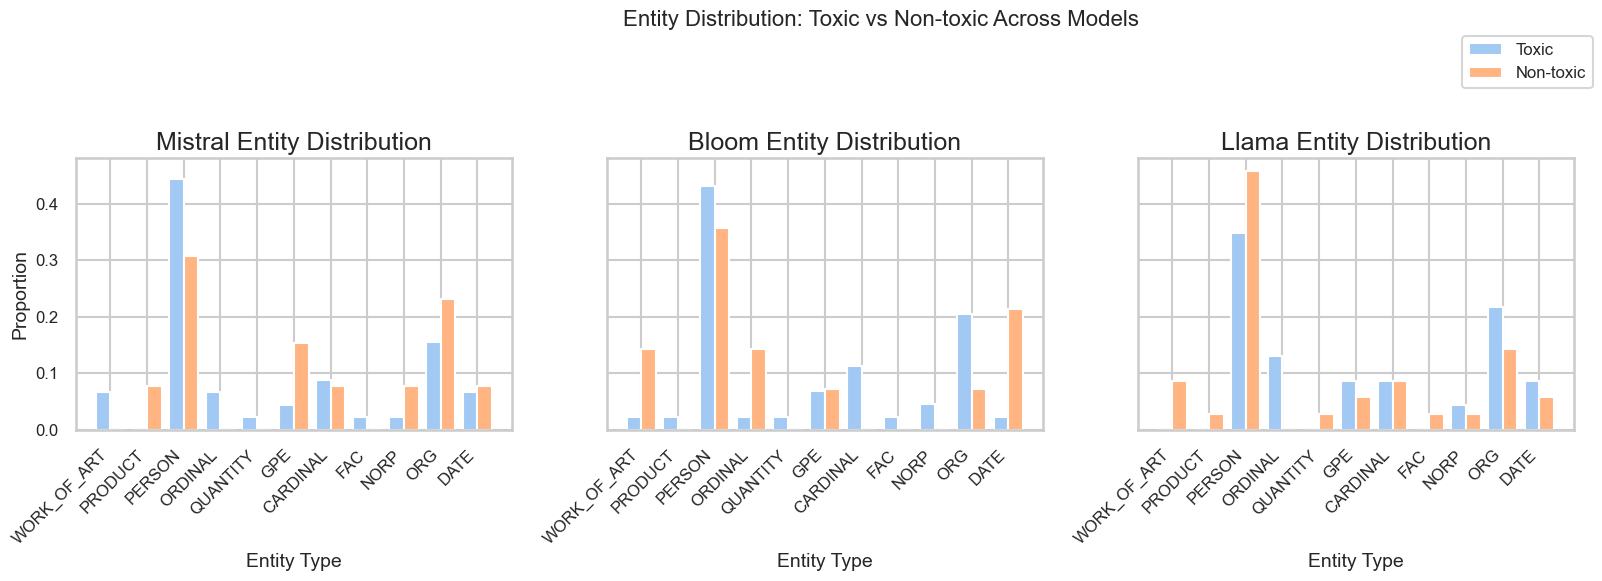

In [186]:
# Function to plot entity comparison for each model in a subplot
def plot_entity_comparison_combined(toxic_entity_counts_list, nontoxic_entity_counts_list, model_names, entity_labels):
    num_models = len(model_names)
    
    fig, axes = plt.subplots(1, num_models, figsize=(18, 6), sharey=True)
    
    for i, (toxic_entity_counts, nontoxic_entity_counts, model_name) in enumerate(zip(toxic_entity_counts_list, nontoxic_entity_counts_list, model_names)):
        toxic_sizes = [toxic_entity_counts.get(entity, 0) for entity in entity_labels]
        nontoxic_sizes = [nontoxic_entity_counts.get(entity, 0) for entity in entity_labels]
        
        bar_width = 0.4
        index = range(len(entity_labels))
        
        axes[i].bar([p - bar_width/2 for p in index], toxic_sizes, bar_width, label='Toxic', color=sns.color_palette("pastel")[0], align='center')
        axes[i].bar([p + bar_width/2 for p in index], nontoxic_sizes, bar_width, label='Non-toxic', color=sns.color_palette("pastel")[1], align='center')
        
        axes[i].set_xlabel('Entity Type')
        axes[i].set_title(f'{model_name} Entity Distribution')
        axes[i].set_xticks(index)
        axes[i].set_xticklabels(entity_labels, rotation=45, ha='right', fontsize=12)
        
    axes[0].set_ylabel('Proportion')
    fig.suptitle('Entity Distribution: Toxic vs Non-toxic Across Models', fontsize=16)
    fig.legend(['Toxic', 'Non-toxic'], loc='upper right', bbox_to_anchor=[0.9, 0.95])
    
    plt.tight_layout(rect=[0, 0, 0.9, 0.9])
    plt.savefig('data/entity_comparison_nontoxic.png')
    plt.show()

# Combine the data for plotting
toxic_entity_counts_list = [mistral_toxic_entity_counts, bloom_toxic_entity_counts, llama_toxic_entity_counts]
nontoxic_entity_counts_list = [mistral_nontoxic_entity_counts, bloom_nontoxic_entity_counts, llama_nontoxic_entity_counts]
model_names = ['Mistral', 'Bloom', 'Llama']

# Plot entity comparison for all models
plot_entity_comparison_combined(toxic_entity_counts_list, nontoxic_entity_counts_list, model_names, all_entity_labels)